In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:


from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
df1=pd.read_csv('F:\\download\\train.csv')

In [4]:
df1.shape

(891, 12)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


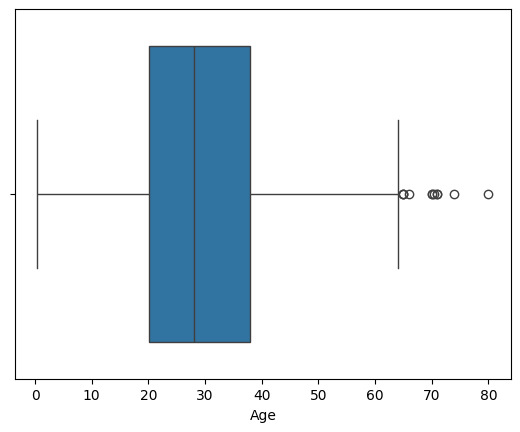

In [6]:
sns.boxplot(x=df1["Age"])
plt.show()  

In [7]:
q1 = df1["Age"].quantile(0.25)
q3 = df1["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr



In [8]:
print(df1[(df1["Age"] < low) | (df1["Age"] > up)])


     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [9]:
print(df1[(df1["Age"] < low) | (df1["Age"] > up)].index)


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [10]:
df1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
def sex (x):
    x=str(x)
    if x=='male':
        return 0
    else :
        return 1

In [12]:
df1["Sex"]=df1["Sex"].apply(sex)

In [13]:
df1.drop('Cabin', axis=1, inplace=True)

In [14]:
df1['Age'].fillna(df1['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [15]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

C:\Users\HACKER BOY 2.0\AppData\Local\Temp\ipykernel_4216\3226543192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True)


In [16]:
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)


In [17]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [18]:
df1['Title'] = df1['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df1['Title'] = df1['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df1['Title'] = df1['Title'].replace(['Mlle', 'Ms'], 'Miss')
df1['Title'] = df1['Title'].replace('Mme', 'Mrs')


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df1['Title'] = df1['Title'].map(title_mapping)
df1['Title'] = df1['Title'].fillna(0)


In [20]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1


In [21]:
df1['IsAlone'] = 1
df1.loc[df1['FamilySize'] > 1, 'IsAlone'] = 0


In [22]:
df1.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [23]:
df1.head(18)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,0,22.000000,1,0,7.2500,False,True,1.0,2,0
1,1,1,1,38.000000,1,0,71.2833,False,False,3.0,2,0
2,1,3,1,26.000000,0,0,7.9250,False,True,2.0,1,1
3,1,1,1,35.000000,1,0,53.1000,False,True,3.0,2,0
4,0,3,0,35.000000,0,0,8.0500,False,True,1.0,1,1
5,0,3,0,29.699118,0,0,8.4583,True,False,1.0,1,1
6,0,1,0,54.000000,0,0,51.8625,False,True,1.0,1,1
7,0,3,0,2.000000,3,1,21.0750,False,True,4.0,5,0
8,1,3,1,27.000000,0,2,11.1333,False,True,3.0,3,0
9,1,2,1,14.000000,1,0,30.0708,False,False,3.0,2,0


In [24]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

In [25]:
X = df1.drop('Survived', axis=1)
y = df1['Survived']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [29]:
y_pred = model.predict(X_test_scaled)


In [30]:
accuracy = accuracy_score(y_test, y_pred)*100


In [31]:
print(accuracy)

78.77094972067039


# Feature extractin 

### number of male and female  surviver

In [45]:
male_surviver=df1[df1[df1['Survived']==1]==0].count()

In [44]:
female_surviver=df1[df1[df1['Survived']==1]==1].count()

In [48]:
print('male_surviver :',male_surviver[0])
print('female_surviver :',female_surviver[0])

male_surviver : 0
female_surviver : 342


C:\Users\HACKER BOY 2.0\AppData\Local\Temp\ipykernel_4216\1233589838.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('male_surviver :',male_surviver[0])
C:\Users\HACKER BOY 2.0\AppData\Local\Temp\ipykernel_4216\1233589838.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('female_surviver :',female_surviver[0])


### 342 Females survive

# WHICH PESSANGER CLASS SERVIVE MORE 

In [56]:
print(Survived.groupby('Pclass').count())

        Survived  Sex  Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S  Title  \
Pclass                                                                          
1            136  136  136    136    136   136         136         136    136   
2             87   87   87     87     87    87          87          87     87   
3            119  119  119    119    119   119         119         119    119   

        FamilySize  IsAlone  
Pclass                       
1              136      136  
2               87       87  
3              119      119  


# 136 of class one servived ,  87 of class 2 servived  ,119  of class 3 servived 

In [57]:
Survived=df1[df1['Survived']==1]

In [58]:
non_Survived=df1[df1['Survived']==0]

In [60]:
print(non_Survived.groupby('Pclass').count())

        Survived  Sex  Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S  Title  \
Pclass                                                                          
1             80   80   80     80     80    80          80          80     80   
2             97   97   97     97     97    97          97          97     97   
3            372  372  372    372    372   372         372         372    372   

        FamilySize  IsAlone  
Pclass                       
1               80       80  
2               97       97  
3              372      372  


## most non servived passenger are from class 3  which count is 372

In [1]:
p1_ratio=136/(136+80)

In [3]:
p2_ratio=87/(87+97)

In [4]:
p3_ratio=119/(119+372)

## survived ratio per passanger class 

In [6]:
print("servived ratio of p1 class ",p1_ratio)
print("servived ratio of  p2 class ",p2_ratio)
print("servived ratio of p3 class  ",p3_ratio)

servived ratio of p1 class  0.6296296296296297
servived ratio of  p2 class  0.47282608695652173
servived ratio of p3 class   0.24236252545824846


### P1 class passanger survived chance is more which is 62.96